### DS102 | In Class Practice Week 5A - Linear Regression
<hr>

## Learning Objectives
At the end of the lesson, you will be able to:

- appreciate that linear regression (Ordinary Least Squares / OLS) minimises the sum of squared errors

- use OLS using `statsmodels.api`

**Datasets required:**

- `houses-100.csv`

- `KX_test.csv`

- `KX_train.csv`

- `Ky_test.csv`

- `Ky_train.csv`


Import the libraries & settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:,.2f}'.format
sns.set()

### Read from CSV File & Exploratory Data Analysis
Read `housing-100.csv` into a `df`.

In [2]:
df = pd.read_csv('housing-100.csv')
display(df.head())
print(df.info())
display(df.describe(include='all'))

,FloorArea,SalePrice
0,1950,151000
1,7252,134900
2,4230,208900
3,9000,139000
4,1680,119500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
FloorArea    100 non-null int64
SalePrice    100 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB
None


,FloorArea,SalePrice
count,100.00,100.00
mean,"8,776.57","168,467.89"
std,"3,453.48","64,472.20"
min,"1,680.00","52,000.00"
25%,"6,741.75","126,625.00"
50%,"8,400.00","154,000.00"
75%,"10,351.25","204,187.50"
max,"21,695.00","319,000.00"


**Revision Exercise**: Plot a scatter plot where the `FloorArea` is the **input feature** ($x$-axis) and the `SalePrice` is the **target variable** ($y$-axis).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


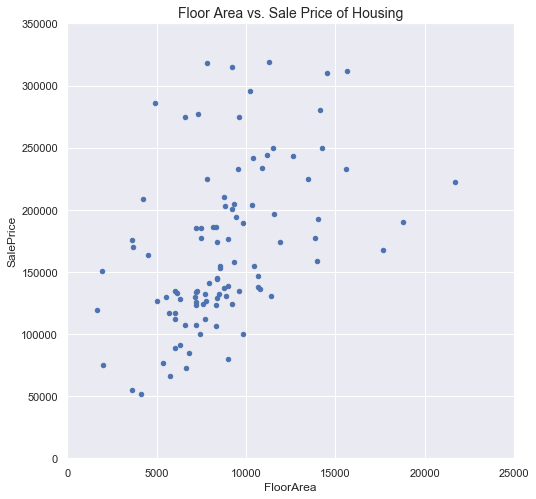

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Exercise: Plot the scatterplot for FloorArea and SalePrice
df.plot(kind = 'scatter', x = 'FloorArea', y = 'SalePrice', ax=ax)

# Additional parameters are given to you.
ax.set_title("Floor Area vs. Sale Price of Housing", fontsize=14)
ax.set_xlim(0, 25000, 250)
ax.set_ylim(0, 350001, 25000)
plt.show()

<hr>
We are now ready to perform the training of the model.

### Linear Regression: Problem Statement

Given the `FloorArea` of a house that has not been seen before, what is its predicted `SalePrice`, given the existing data given?

### Create $\textbf{X}$ and $\textbf{y}$, the input variables and target variable

Declare 2 variables, `X` to represent $\textbf{X}$ the input variable and `y` to represent $\textbf{y}$ the target variable. (Note that both $\textbf{X}$ and $\textbf{y}$ are bold to show they are a matrix and vector respectively.)

Note: `X` must be a `DataFrame` and `y` must be a `Series`.

In [6]:
df.head(2)

,FloorArea,SalePrice
0,1950,151000
1,7252,134900


In [7]:
# Declare X and y

X = df[['FloorArea']]
y = df['SalePrice']

### TRAIN

Use `model = sm.OLS(y, X)` to instantiate the model. Then, use `results = model.fit()` to train the model using the training set.

In [26]:
# Create the Model
model = sm.OLS(y,X)

# Train the model on the training set
results = model.fit()

# Print the summary results

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     645.3
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           3.69e-45
Time:                        20:38:05   Log-Likelihood:                -1251.3
No. Observations:                 100   AIC:                             2505.
Df Residuals:                      99   BIC:                             2507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FloorArea     17.8086      0.701     25.402      0.000      16.418      19.200
==============================================================================
Omnibus:                        5.147   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.113
Skew:                           0.334   Prob(JB):                       0.0776
Kurtosis:                       3.884   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are many results of the `model.fit()` step. However, the results to know are:
- `Dep Variable`, `No. Observations`, `R-Squared` and 

- `coef`, `t` and `P>|t|`.

### PREDICT ON TRAINING SET (Drawing the fitted line)

We now attempt to plot the fitted line for the training set. Use `results.fittedvalues` to get the predicted `SalePrice` for all houses in the training set.

In [14]:
# Use results.fittedvalues to retrieve the fitted values 
results.fittedvalues.head()

0    34,726.80
1   129,148.09
2    75,330.45
3   160,277.55
4    29,918.48
dtype: float64

Add this as a column in the original `df`.

In [15]:
# Add the fitted values as a column in the df
df['fitted_SalePrice'] = results.fittedvalues
df.head()

,FloorArea,SalePrice,fitted_SalePrice
0,1950,151000,"34,726.80"
1,7252,134900,"129,148.09"
2,4230,208900,"75,330.45"
3,9000,139000,"160,277.55"
4,1680,119500,"29,918.48"


Finally, plot the dataset and the fitted line.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


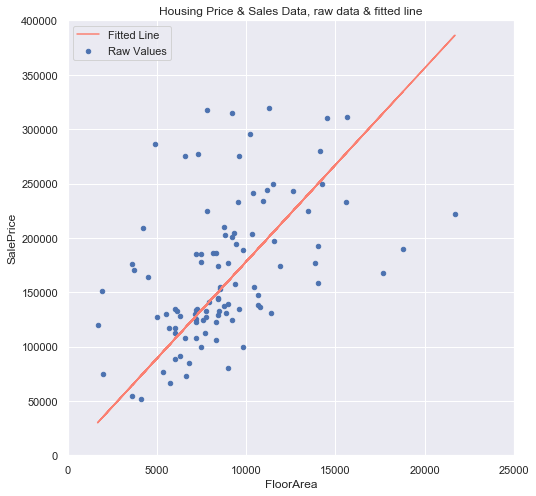

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Exercise: Plot the scatterplot for FloorArea and SalePrice
df.plot(kind = 'scatter', x='FloorArea', y = 'SalePrice', ax=ax)
df.plot(kind = 'line', x='FloorArea', y = 'fitted_SalePrice', ax=ax, color='salmon')


# Additional parameters are given to you.
ax.set_title("Floor Area vs. Sale Price of Housing", fontsize=14)
ax.legend(['Fitted Line', 'Raw Values'])
ax.set_title("Housing Price & Sales Data, raw data & fitted line")
ax.set_xlim(0, 25000, 250)
ax.set_ylim(0, 400001, 25000)
plt.show()

### PREDICT
**Q: ** If the floor area of a house is $20000$, what is the expected price of the house?

First, create `X2`, containing the new values you want to use to predict.

In [19]:
# First create X2 to represent the new house
X2 = pd.DataFrame({'FloorArea': [20000]})
X2

,FloorArea
0,20000


Then, predict the price of this house using `results.predict()`.

In [20]:
# Use results.predict(X2) to get the predicted house price
results.predict(X2)

0   356,172.33
dtype: float64

**Q: ** What is the expected price of a house with a floor area of $30000$?

In [28]:
# Exercise: What is the expected price of a house with floor area 30000?
X3 = pd.DataFrame({'FloorArea': [30000]})
results.predict(X3).iloc[0]



534258.5001250455

<hr>
<center>$\diamond$</center>

### Further Exploration - GOOG and AAPL Prices Best Fit Line

Use the results of `sm.OLS()` to find the coefficients of the best fit line in Week 3's GOOG and AAPL scatter plot example.

In [22]:
# Read from CSV
goog_df, aapl_df = pd.read_csv('goog-close.csv'), pd.read_csv('aapl-close.csv') # Read from CSV
merged_df = goog_df.merge(aapl_df, on='Date') # Create the merged DF, X and y
stock_X, stock_Y = merged_df[['GOOG_Close']], merged_df['AAPL_Close']

FileNotFoundError: [Errno 2] File b'goog-close.csv' does not exist: b'goog-close.csv'

In [ ]:
# Write the OLS fit step here
#

In [ ]:
# Plot the dataset and the fitted line for GOOG vs. AAPL here
#
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Plot the scatter plot & fitted line
#

# Update the legend and add a title
ax1.legend(['Fitted Line', 'Raw Values'])
plt.title("GOOG Closing Price vs. AAPL Closing Price, Fitted & Actual")

### Further Exploration - Multivariate Regression

In this example, you can extend the `ols` functionality to perform multivariate regression.

In [ ]:
# Read from CSV the following files: KX_train, KX_test, Ky_train, Ky_test
KX_train = pd.read_csv('KX_train.csv')
KX_test = pd.read_csv('KX_test.csv')
Ky_train = pd.read_csv('Ky_train.csv')
Ky_test = pd.read_csv('Ky_test.csv')

We believe that the price of a house is affected by the its size, whether it has a view and the age of the house. For both `KX_train` and `KX_test`, create a new column `age` where it is calculated using `2018 - df['yr_built']`.

In [ ]:
# Create the 'age' column for KX_train and KX_test
#
KX_train['age'] =  2018 - KX_train['yr_built'] 
KX_test['age'] = 2018 - KX_test['yr_built'] 

### TRAIN
Now, build the multivariate regression model. There are 4 variables that will affect the price of the house:

$$
price = \beta_1\times sqft\_living_i - \beta_2\times age_i + \beta_3\times floors_i + \epsilon_i
$$

In [ ]:
feature_list = ['sqft_living', 'age', 'floors']

# Build the X variables from KX_train and feature_list as the column list
#
KX_train = KX_train[feature_list]

# Build the y variable
#
Ky_train = Ky_train['price']

Create the model. In this case, similarly, parse the `X` and the `y` into the `sm.OLS()` function. Then print the summary results.

In [ ]:
# Create the Model
#
k_model = sm.OLS(Ky_train, KX_train)

# Fit the dataset
#
k_results = k_model.fit()

# Print the summary results
#
k_results.summary()

### TEST

From the model, you can now see the predictions by the coefficients. You can now perform predictions on a new house you have not seen before.

In [ ]:
# Randomly pick a sample from KX_test
#
test_sample_index = np.random.randint(0, 999)
print(KX_test.iloc[test_sample_index])
print()

In [ ]:
# Print the predicted price of the house
#
Ky_predict = k_results.predict(pd.DataFrame(KX_test.iloc[test_sample_index][feature_list]).transpose())
print(Ky_predict)

In [ ]:
# Print the observed price of the house
#
print(Ky_test.iloc[test_sample_index]['price'])

**Credits:**
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
- https://www.kaggle.com/andres111mejia/king-county-house-sales-split-dataset/kernels